<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Long-Short-Term-Memory-Reccurent-Neural-Network" data-toc-modified-id="Long-Short-Term-Memory-Reccurent-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Long-Short-Term-Memory Reccurent Neural Network</a></span></li><li><span><a href="#Target-Variable:-Temperature" data-toc-modified-id="Target-Variable:-Temperature-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Target Variable: Temperature</a></span></li><li><span><a href="#Target-Variable:-Windspeed" data-toc-modified-id="Target-Variable:-Windspeed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Target Variable: Windspeed</a></span></li><li><span><a href="#Target-Variable:-Pressure" data-toc-modified-id="Target-Variable:-Pressure-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Target Variable: Pressure</a></span></li><li><span><a href="#Classification-of-Precipitation" data-toc-modified-id="Classification-of-Precipitation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classification of Precipitation</a></span></li></ul></div>

## Long-Short-Term-Memory Reccurent Neural Network 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()

In [4]:
def prediction_plot(x,y,z,a,b):
        
    plt.plot(x)
    plt.plot(y)
    plt.suptitle(b,fontsize=15)
    plt.ylabel(z)
    plt.xlabel('Hour')
    plt.ylim(0,14)  
    labels=('actual','predicted')
    plt.legend(labels)
    plt.savefig(a, dpi=500);

In [5]:
## load cleaned weather data

df = pd.read_csv('weather_data_cleaned.csv', index_col='MESS_DATUM', parse_dates=True)
df = df.iloc[:,1:]

# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#df = scaler.fit_transform(df)
#df = pd.DataFrame(df, columns=cols)
#df = df.iloc[:,1:]

## Target Variable: Temperature

In [17]:
# train/test split 
X = df[['ATMO_LBERG', 'FD_LBERG', 'FG_LBERG', 'ZENIT', 'V_VV', 'V_N','V_TE005']]
Y = df.TT_TU

# choosing 9 days to test winter, summer, autumn and spring
X_test_winter = ['2019-01-02','2019-01-03','2019-01-04','2019-01-05','2019-01-06',
                '2019-01-07','2019-01-08','2019-01-09','2019-01-10']
X_test_summer = ['2019-07-02','2019-07-03','2019-07-04','2019-07-05','2019-07-06',
                '2019-07-07','2019-07-08','2019-07-09','2019-07-10']
X_test_autumn = ['2019-10-02','2019-10-03','2019-10-04','2019-10-05','2019-10-06',
                '2019-10-07','2019-07-08','2019-07-09','2019-07-10']
X_test_spring = ['2019-04-02','2019-04-03','2019-04-04','2019-04-05','2019-04-06',
                '2019-04-07','2019-04-08','2019-04-09','2019-04-10']

X_train_winter = ['2019-01-01','2019-01-02','2019-01-03','2019-01-04','2019-01-05',
                '2019-01-06','2019-01-07','2019-01-08','2019-01-09']
X_train_summer = ['2019-07-01','2019-07-02','2019-07-03','2019-07-04','2019-07-05',
                '2019-07-06','2019-07-07','2019-07-08','2019-07-09']
X_train_autumn = ['2019-10-01','2019-10-02','2019-10-03','2019-10-04','2019-10-05',
                '2019-10-06','2019-07-07','2019-07-08','2019-07-09']
X_train_spring = ['2019-04-01','2019-04-02','2019-04-03','2019-04-04','2019-04-05',
                '2019-04-06','2019-04-07','2019-04-08','2019-04-09']


Epoch 1/10
122345/122345 [==============================] - 49s 400us/step - loss: 54.9490
Epoch 2/10
122345/122345 [==============================] - 58s 470us/step - loss: 7.5666
Epoch 3/10
122345/122345 [==============================] - 61s 496us/step - loss: 5.9230
Epoch 4/10
122345/122345 [==============================] - 61s 499us/step - loss: 5.5536
Epoch 5/10
122345/122345 [==============================] - 61s 498us/step - loss: 5.2769
Epoch 6/10
122345/122345 [==============================] - 61s 495us/step - loss: 5.0109
Epoch 7/10
122345/122345 [==============================] - 61s 495us/step - loss: 4.8418
Epoch 8/10
122345/122345 [==============================] - 61s 497us/step - loss: 4.72140s - loss: 4.
Epoch 9/10
122345/122345 [==============================] - 61s 496us/step - loss: 4.6609
Epoch 10/10
122345/122345 [==============================] - 61s 496us/step - loss: 4.5474
Epoch 1/10
122369/122369 [==============================] - 66s 543us/step - loss: 56

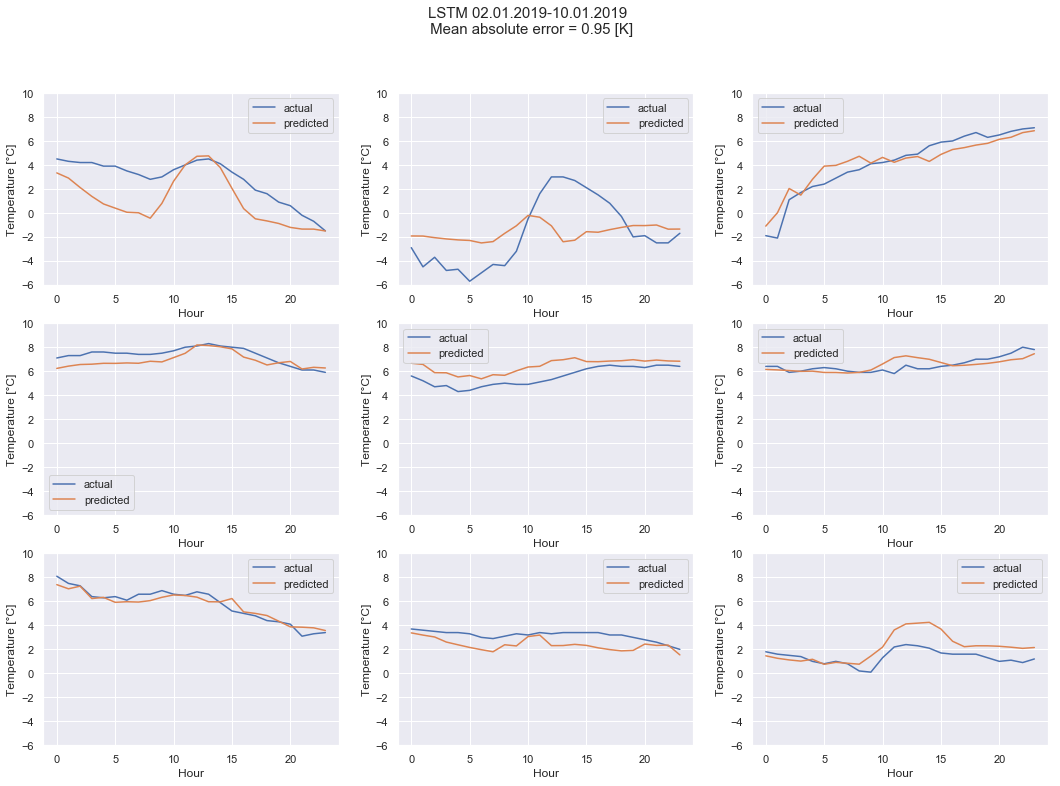

In [19]:
# Stacked LSTM for Regression

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_winter, X_train_winter, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    X_test, Y_test = np.array(X_test), np.array(Y_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    regressor = Sequential()

    regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    regressor.fit(X_train, Y_train, epochs = 10, batch_size = 100)
    
    # prediction
    y_pred = regressor.predict(X_test)
    #y_pred = scaler.inverse_transform(y_pred)
    
    # Metrics
    mae0 = mean_absolute_error(Y_test, y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Temperature [°C]','Images/LSTM_winter.png','LSTM 02.01.2019-10.01.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [K]')
    
    

## Target Variable: Windspeed

In [12]:
# split into train and test sets
X = df[['FD_LBERG', 'FG_LBERG', 'ZENIT', 'RF_TU', 'V_N', 'P', 'DD', 'V_TE050']]
Y = df.FF

# choosing 9 days to test winter, summer, autumn and spring
X_test_winter = ['2019-01-02','2019-01-03','2019-01-04','2019-01-05','2019-01-06',
                '2019-01-07','2019-01-08','2019-01-09','2019-01-10']
X_test_summer = ['2019-07-02','2019-07-03','2019-07-04','2019-07-05','2019-07-06',
                '2019-07-07','2019-07-08','2019-07-09','2019-07-10']
X_test_autumn = ['2019-10-02','2019-10-03','2019-10-04','2019-10-05','2019-10-06',
                '2019-10-07','2019-07-08','2019-07-09','2019-07-10']
X_test_spring = ['2019-04-02','2019-04-03','2019-04-04','2019-04-05','2019-04-06',
                '2019-04-07','2019-04-08','2019-04-09','2019-04-10']

X_train_winter = ['2019-01-01','2019-01-02','2019-01-03','2019-01-04','2019-01-05',
                '2019-01-06','2019-01-07','2019-01-08','2019-01-09']
X_train_summer = ['2019-07-01','2019-07-02','2019-07-03','2019-07-04','2019-07-05',
                '2019-07-06','2019-07-07','2019-07-08','2019-07-09']
X_train_autumn = ['2019-10-01','2019-10-02','2019-10-03','2019-10-04','2019-10-05',
                '2019-10-06','2019-07-07','2019-07-08','2019-07-09']
X_train_spring = ['2019-04-01','2019-04-02','2019-04-03','2019-04-04','2019-04-05',
                '2019-04-06','2019-04-07','2019-04-08','2019-04-09']


Epoch 1/20
126685/126685 [==============================] - 71s 561us/step - loss: 4.1175
Epoch 2/20
126685/126685 [==============================] - 53s 420us/step - loss: 3.4632
Epoch 3/20
126685/126685 [==============================] - 53s 418us/step - loss: 3.4008
Epoch 4/20
126685/126685 [==============================] - 53s 416us/step - loss: 3.3587
Epoch 5/20
126685/126685 [==============================] - 53s 419us/step - loss: 3.3097
Epoch 6/20
126685/126685 [==============================] - 53s 418us/step - loss: 3.2549
Epoch 7/20
126685/126685 [==============================] - 53s 420us/step - loss: 3.2001
Epoch 8/20
126685/126685 [==============================] - 53s 419us/step - loss: 3.1719
Epoch 9/20
126685/126685 [==============================] - 53s 422us/step - loss: 3.1694
Epoch 10/20
126685/126685 [==============================] - 53s 420us/step - loss: 3.1391
Epoch 11/20
126685/126685 [==============================] - 53s 421us/step - loss: 3.1266
Epoch 12

126781/126781 [==============================] - 53s 417us/step - loss: 3.1123
Epoch 12/20
126781/126781 [==============================] - 53s 415us/step - loss: 3.0999
Epoch 13/20
126781/126781 [==============================] - 53s 419us/step - loss: 3.0902
Epoch 14/20
126781/126781 [==============================] - 53s 416us/step - loss: 3.0878
Epoch 15/20
126781/126781 [==============================] - 53s 417us/step - loss: 3.0741
Epoch 16/20
126781/126781 [==============================] - 53s 418us/step - loss: 3.0625
Epoch 17/20
126781/126781 [==============================] - 53s 419us/step - loss: 3.0474
Epoch 18/20
126781/126781 [==============================] - 53s 419us/step - loss: 3.0513
Epoch 19/20
126781/126781 [==============================] - 53s 417us/step - loss: 3.0432
Epoch 20/20
126781/126781 [==============================] - 53s 420us/step - loss: 3.0258
Epoch 1/20
126805/126805 [==============================] - 67s 525us/step - loss: 4.1164
Epoch 2/20
1

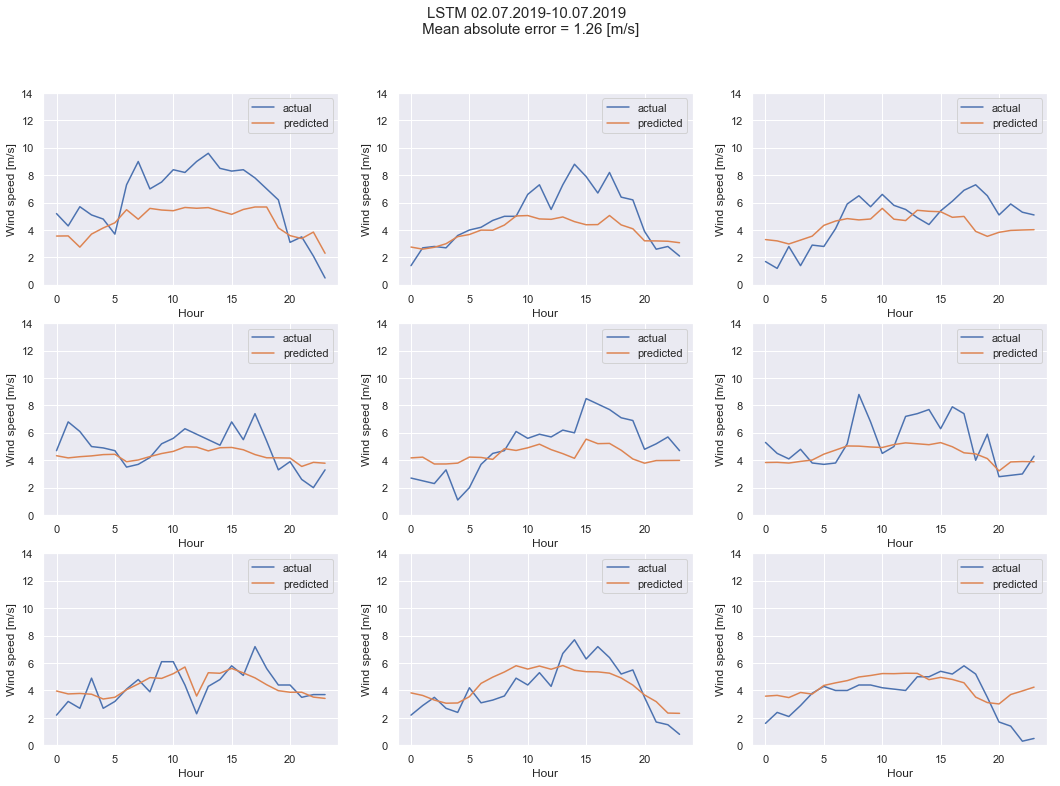

In [19]:
# Stacked LSTM for Regression

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_summer, X_train_summer, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    X_test, Y_test = np.array(X_test), np.array(Y_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    regressor = Sequential()

    regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    regressor.fit(X_train, Y_train, epochs = 20, batch_size = 90)
    
    # prediction
    y_pred = regressor.predict(X_test)
    #y_pred = scaler.inverse_transform(y_pred)
    
    # Metrics
    mae0 = mean_absolute_error(Y_test, y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_LSTM_summer.png','LSTM 02.07.2019-10.07.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    

## Target Variable: Pressure

In [76]:
X = df[['SD_LBERG', 'ATMO_LBERG', 'RF_TU', 'V_N', 'V_S1_HHS', 'FF']]
Y = df.P

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

In [77]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [78]:
# Stacked LSTM for Regression

regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, Y_train, epochs = 100, batch_size = 50)

Epoch 1/100
134389/134389 [==============================] - 69s 510us/step - loss: 855278.1396
Epoch 2/100
134389/134389 [==============================] - 64s 473us/step - loss: 591782.0519
Epoch 3/100
134389/134389 [==============================] - 64s 473us/step - loss: 382730.5567
Epoch 4/100
134389/134389 [==============================] - 63s 472us/step - loss: 222972.5580
Epoch 5/100
134389/134389 [==============================] - 64s 473us/step - loss: 109937.1789
Epoch 6/100
134389/134389 [==============================] - 63s 472us/step - loss: 41244.3001
Epoch 7/100
134389/134389 [==============================] - 64s 473us/step - loss: 10622.8810
Epoch 8/100
134389/134389 [==============================] - 64s 473us/step - loss: 4402.9811
Epoch 9/100
134389/134389 [==============================] - 64s 473us/step - loss: 4219.3620
Epoch 10/100
134389/134389 [==============================] - 64s 474us/step - loss: 4213.8577
Epoch 11/100
134389/134389 [===================

In [79]:
# prediction
y_pred_press = regressor.predict(X_test)
#y_pred = scaler.inverse_transform(y_pred)

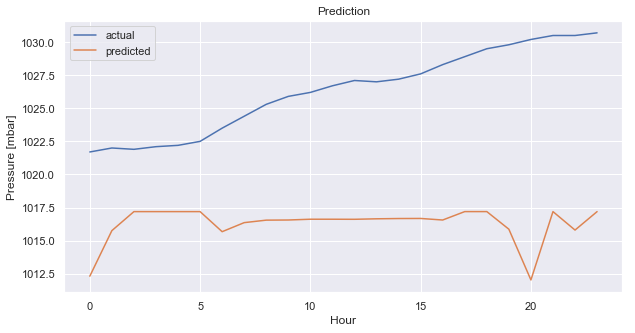

In [80]:
prediction_plot(Y_test,y_pred_press,'Pressure [mbar]')

In [81]:
# Metrics
mae0 = mean_absolute_error(Y_test.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.ravel(), y_pred))
r2 = r2_score(Y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1019.85
RMSE: 1019.85
R2: -109772.43


In [82]:
# We add the LSTM layer and later add a few Dropout layers to prevent overfitting. We add the LSTM layer with the 
# following arguments:

# 50 units which is the dimensionality of the output space
# return_sequences=True which determines whether to return the last output in the output sequence, or the 
# full sequence input_shape as the shape of our training set. When defining the Dropout layers, we specify 
# 0.2, meaning that 20% of the layers will be dropped. Thereafter, we add the Dense layer that specifies the 
# output of 1 unit. After this, we compile our model using the popular adam optimizer and set the loss as 
# the mean_squarred_error. This will compute the mean of the squared errors. Next, we fit the model to run 
# on 100 epochs with a batch size of 32. 

## Classification of Precipitation

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)
